In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")

In [8]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
data.to_csv(r"C:\Users\pavan\Desktop\Mounika\Learning\YouTube\Logistic Regression\HR attrition rate.csv")

In [13]:
hr_data = pd.read_csv("HR attrition rate.csv")

In [14]:
hr_data.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
hr_data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
hr_data.to_csv(r"C:\Users\pavan\Desktop\Mounika\Learning\YouTube\Logistic Regression\HR attrition rate_1.csv")

In [19]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
hr_data.shape

(14999, 10)

In [21]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [22]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


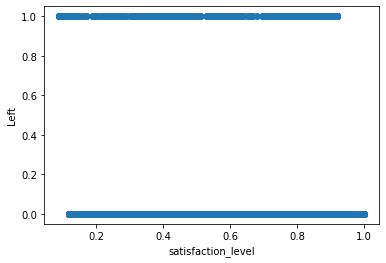

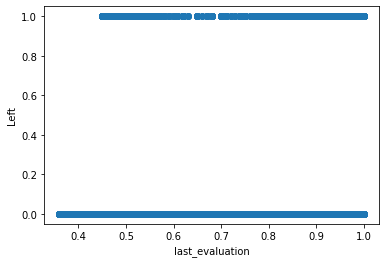

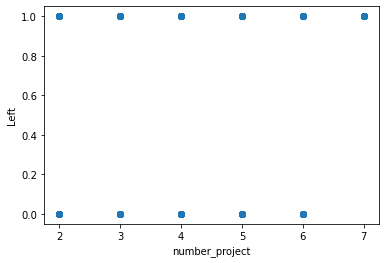

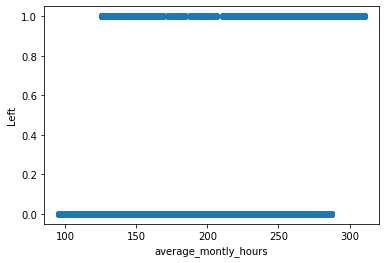

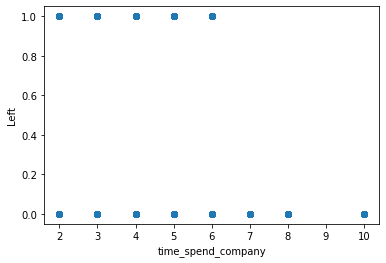

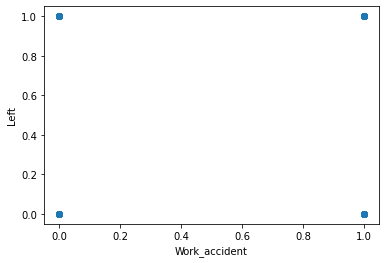

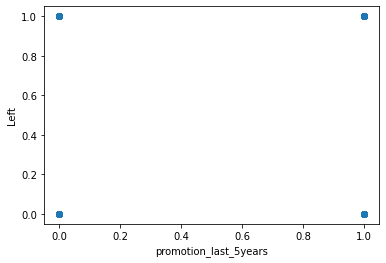

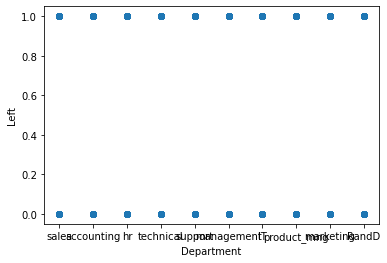

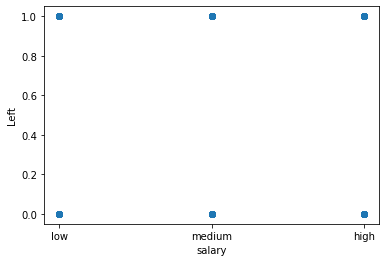

In [23]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department', 'salary']

for i in cols:
    plt.scatter(hr_data[i], hr_data['left'])
    plt.xlabel(i)
    plt.ylabel("Left")
    plt.show()

In [25]:
# correlation

hr_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


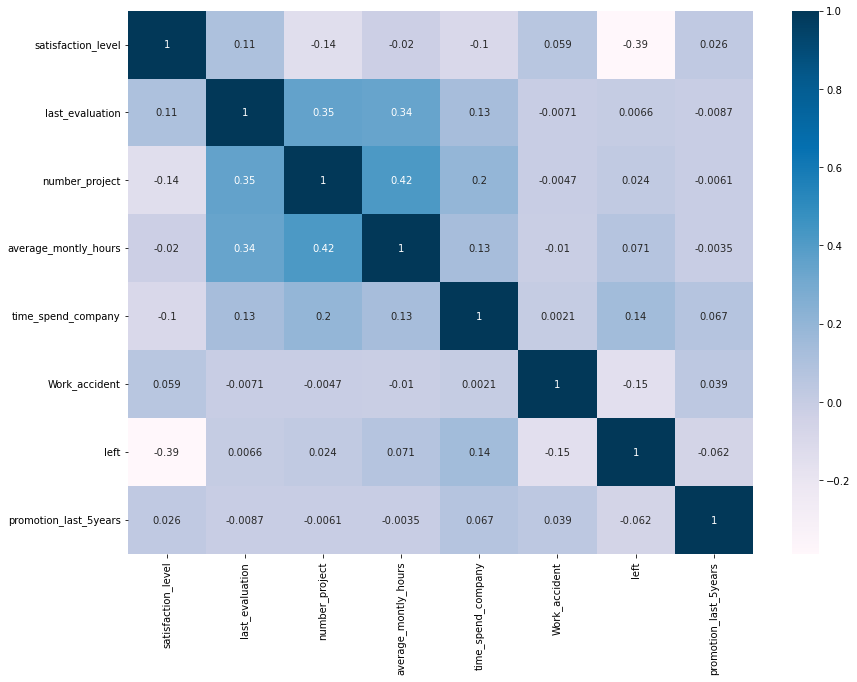

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(hr_data.corr(), annot=True, cmap='PuBu')
plt.show()

### chcek null values
### check duplicated values

In [27]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [29]:
hr_data[hr_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<AxesSubplot:>

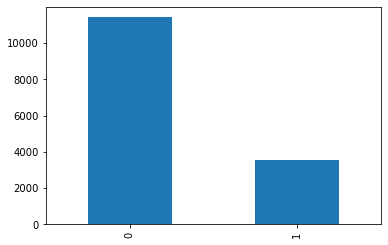

In [37]:
hr_data.left.value_counts().plot(kind='bar')

In [30]:
X = hr_data.drop('left', axis=1)
y = hr_data.left

In [31]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [39]:
X.select_dtypes('O')

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [40]:
X['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [41]:
X['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
X['Department'] = le.fit_transform(X['Department'])

In [46]:
X['salary'] = le.fit_transform(X['salary'])

In [47]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [32]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=1)

In [71]:
len(xtrain)

11249

In [72]:
len(xtest)

3750

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [82]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [83]:
model.score(xtest, ytest)

0.7725333333333333

In [85]:
y_predicted = model.predict(xtest)

In [86]:
y_predicted

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error,mean_squared_error

In [94]:
print("confusion matrix \n {} \n and classification report {} \n and mean_absolute_error {} \n and mean_squared_error {} ".format(confusion_matrix(ytest, y_predicted), classification_report(ytest, y_predicted),mean_absolute_error(ytest, y_predicted),mean_squared_error(ytest, y_predicted)))

confusion matrix 
 [[2649  204]
 [ 649  248]] 
 and classification report               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2853
           1       0.55      0.28      0.37       897

    accuracy                           0.77      3750
   macro avg       0.68      0.60      0.61      3750
weighted avg       0.74      0.77      0.74      3750
 
 and mean_absolute_error 0.22746666666666668 
 and mean_squared_error 0.22746666666666668 
